#                           DIABETES PREDICTION IN FEMALE


### Problem Statement
Diabetes is one of the ailments that takes lives if not detected early and treated. Knowing and confirming the variables that contribute to this disease is one of the aims of this project. I want to  find out the variable(s) that are indicators of diabetes as this would be variables that other women would try to work on so that they don't get diagnosed with diabetes. Like a quote from one of my favourite movie says,"If you know yourself and know your enemy,then there would be no reason to fight". Likewise,if we know what to watch out for, we stand a better chance of being safe from it or detecting it early.

### Information about the dataset
This dataset was recorded with information from female patients that has been diagnosed or not diagnosed with Diabetes. With the aid this machine learning project, females can know what to look out for in order not to have the ailment and they will also be able to get a preliminary diagnosis on their status. This data was gotten from females of Pima Indian heritage who were 21 years and above.

The dataset contains the following variables:

1) Pregnancies: Number of times pregnant<br />
2) Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br />
3) BloodPressure: Diastolic blood pressure (mm Hg)<br />
4) SkinThickness: Triceps skin fold thickness (mm)<br />
5) Insulin: 2-Hour serum insulin (mu U/ml)<br />
6) BMI: Body mass index (weight in kg/(height in m)^2)<br />
7) DiabetesPedigreeFunction: is it inheditary? Depending on which part of the family it is, the values are different. The pedigree function of parents is different from that of uncles of grandparents,etc<br />
8) Age: Age (years)<br />
9) Outcome: Class variable (0 or 1)

In order to further understand some of the variables, you can click on the below links

. [BMI](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/english_bmi_calculator/bmi_calculator.html)<br />
. [GLUCOSE](https://www.mountsinai.org/health-library/tests/glucose-tolerance-test-non-pregnant)<br />
. [INSULIN](https://www.endocrineweb.com/conditions/diabetes/diagnosing-diabetes)<br />



**By the end of this project,i hope to have answers to the problem statement and to be able to build a model that can diagnose the patients correctly**


# Data Preprocessing

In [1]:
#Importing Libraries to use for exploration of the data
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
data.head(5) #Getting a glimpse at the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Renaming the columns to an easy-to-understand names
data=data.rename(columns={"BloodPressure":"Blood Pressure","SkinThickness":"Skin Thickness",
                          "DiabetesPedigreeFunction":"Pedigree Function"})
data.head(3)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
#Checking the shape of the data
print(f"The dataset contains: {data.shape[0]} rows and {data.shape[1]} columns")

The dataset contains: 768 rows and 9 columns


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   Blood Pressure     768 non-null    int64  
 3   Skin Thickness     768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   Pedigree Function  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Checking for duplicate values
data.duplicated().sum()

0

In [8]:
#Checking for null values
data.isnull().sum()

Pregnancies          0
Glucose              0
Blood Pressure       0
Skin Thickness       0
Insulin              0
BMI                  0
Pedigree Function    0
Age                  0
Outcome              0
dtype: int64

In [9]:
# Checking the measure of central tendency and measure of dispersion
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Blood Pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Skin Thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Pedigree Function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Observations
1) There are 769 rows and 9 columns of data <br />
2) There is no duplicate value<br />
3) The dataset contains no null values<br />
4) The dataset comprises of float and integer data types<br />
5) The minimum pregnancy is zero which can mean that the woman has never been pregnant while the maximum pregnancy is 17<br />
6) Glucose has a minimum value of 0 which isn't possible in an oral glucose tolerance test so this should further be looked into<br />
7) Insulin has a minimum value of 0 which could mean a type 1 diabetes but should be further looked into<br />
8) Skinthickness and BMI both has a minimum value of 0 which isn't possible and may be dropped<br />
9) The dialostic blood pressure has a minimum of 0 which is almost impossible since it means there is no blood flow in the body though it has rare cases in hypotension <br />
9) The age range is from 21-81<br />
10) Blood pressure,skin thickness,insulin and age seems to have outliers due to the distance between the 3rd quartile and maximum value. Should be looked into


# Exploratory Data Analysis
Analysing and creating a visual representation of the relationship between the features

**UNIVARIATE ANALYSIS**

#### Analyzing the continous numerical variables which are Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Pedigree Function and Age

In [10]:
c=["Glucose","Blood Pressure","Skin Thickness","Insulin","BMI","Pedigree Function","Age"]
continous=[features for features in data[c]]

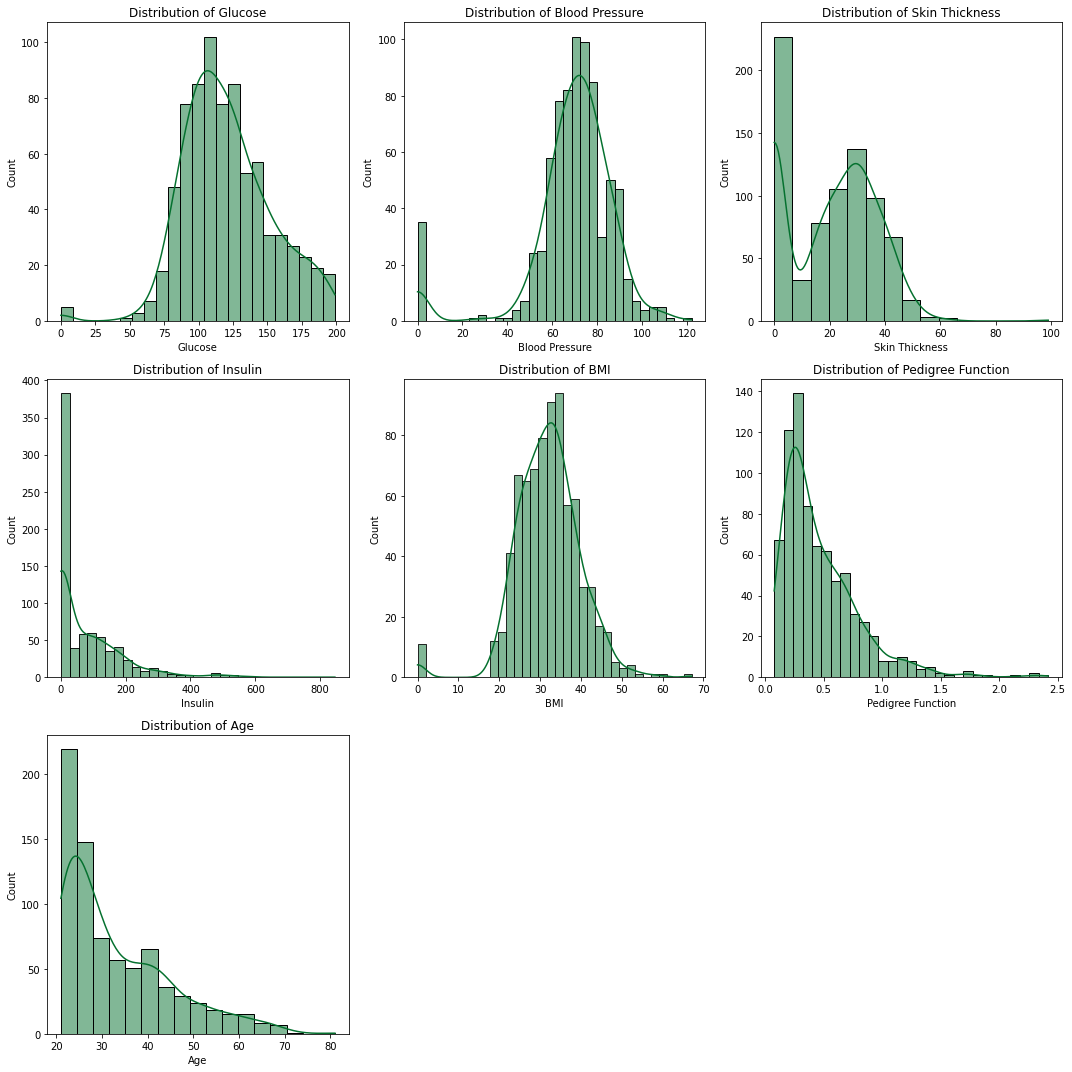

In [11]:
fig = plt.figure(1, (15, 15))
sns.set_palette(sns.color_palette("Greens_r"))
for i,cont in enumerate(continous):
    ax = plt.subplot(3,3,i+1)
    sns.histplot(data[cont],kde=True)
    ax.set_title(f"Distribution of {cont}")
    plt.tight_layout()
    
plt.show()

#### Visualizing the distribution of the Numerical values with emphasis on the outliers

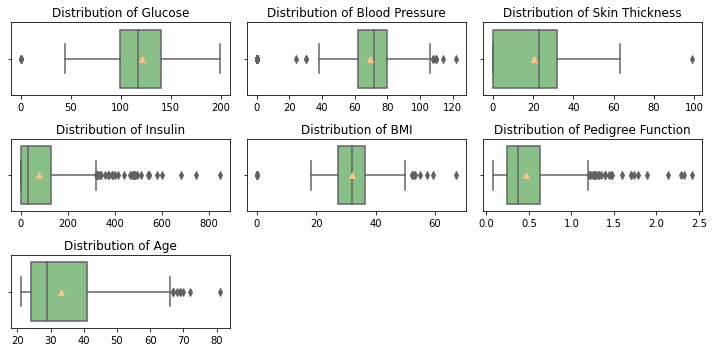

In [12]:
fig = plt.figure(1, (10, 5))
sns.set_palette(sns.color_palette("Accent"))
for i,cont in enumerate(continous):
    ax = plt.subplot(3,3,i+1)
    sns.boxplot(data=data,x=data[cont],showmeans=True)
    ax.set_title(f"Distribution of {cont}")
    ax.set_xlabel("")
plt.tight_layout()

#### Observations
1) Glucose is normally distributed and 0 is the only outlier value.<br />
2) Blood Pressure is normally distributed and have a few outliers...most of which falls in 0. Based on domain knowledge, it's known that diastolitic blood pressure is almost never 0 because blood flows through the body except for rare cases of hypotension where we can have very low blood pressure and rarely 0 as blood pressure. Most of the outliers fall on 0 which means that it's not a rare case of hypotension and 0 can be treated as a missing value.<br />
3) Skin thickness is right skewed and has an outlier value of 99.<br />
4) Insulin is right skewed and has outliers ranging from 300-846.<br />
5) BMI is normally distributed and has 0 as an outlier as well as values between 50-70. We can't have a body mass index of 0 even for an underweight person so we treat 0 as a missing value. The other outliers can be for rare cases of extreme obesity as obesity starts from values greater than 30 BMI <br />
6) Pedigree function is rightskewed <br />
7) Age is right skewed and the outliers falls between 68-81. Age is supposed to be normally distributed by convention but might have been right skewed due to the constraints put on it. 21-81

#### Analysing the discrete numeric variable and the target variable which is Pregnancies and Outcome respectively

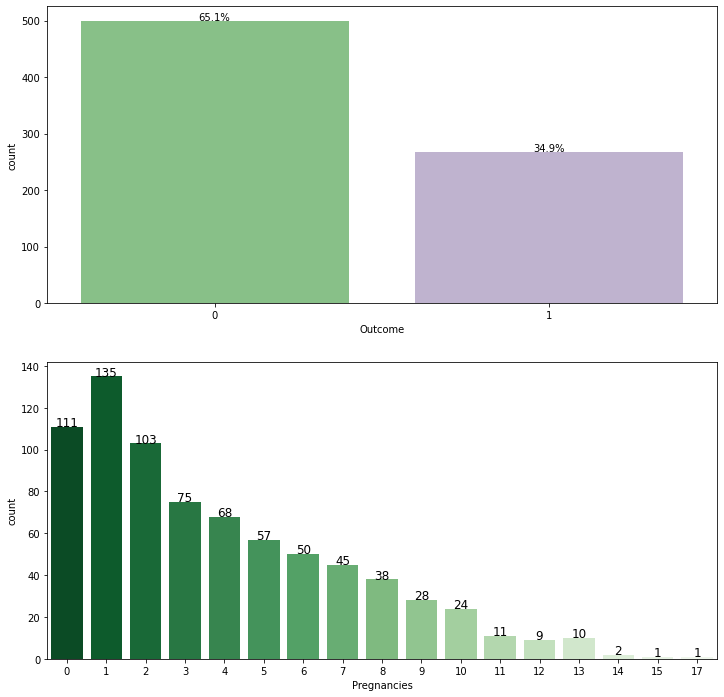

In [13]:
# Getting the count of the number of females in the outcome and pregnancy categories
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
chart1=sns.countplot(x="Outcome",data=data)
for k in chart1.patches:
        percentage = '{:.1f}%'.format(100 * k.get_height()/len(data["Outcome"]))
        x = k.get_x() + k.get_width() / 2
        y = k.get_y() + k.get_height()
        plt.annotate(percentage, (x, y),ha='center')
plt.subplot(2,1,2)
chart2=sns.countplot(x="Pregnancies",data=data,palette="Greens_r")
for l in chart2.patches:
    chart2.annotate(format(l.get_height()),
                   (l.get_x() + l.get_width() / 2,
                    l.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 4),
                   textcoords='offset points')

#### observation
1) The data is imbalanced and the ratio is 65:35.<br />
2) The women with only 1 pregnancy are more prominent in the dataset followed by women that hasn't gotten pregnant. Women with 11-17 pregnancies are low-rare in the dataset

**Bivariate Analysis**

Analysing the relationship between each features and the Outcome variable

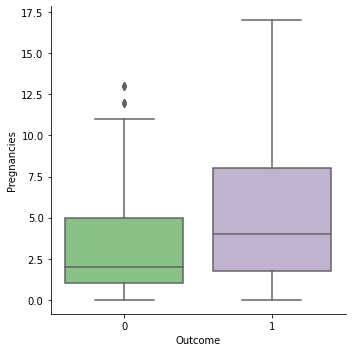

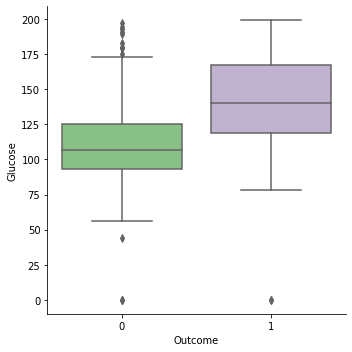

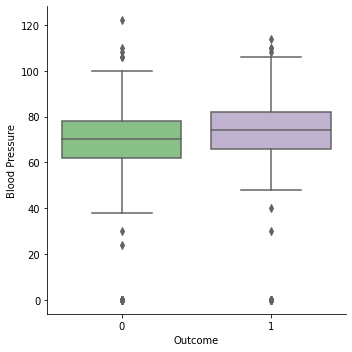

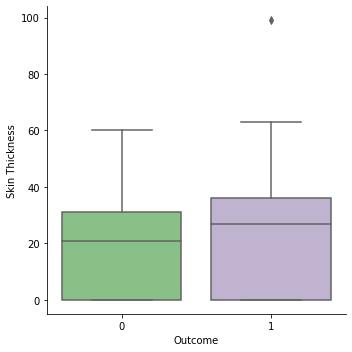

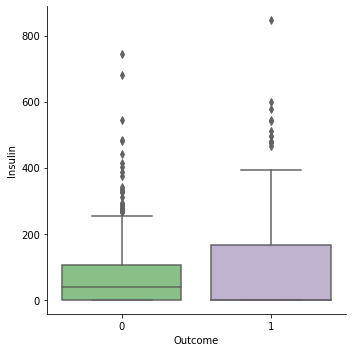

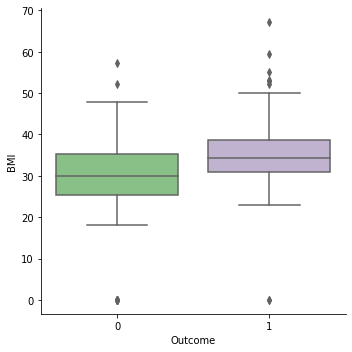

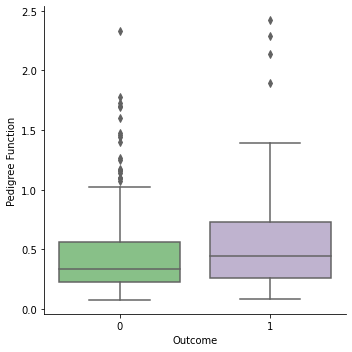

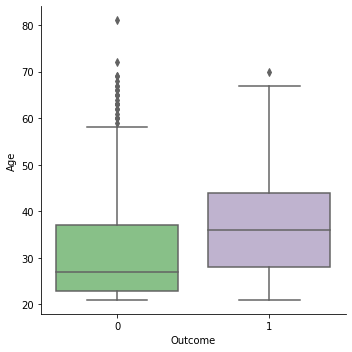

In [14]:
for i,col in enumerate(data.columns[:-1]):
    sns.catplot(x='Outcome', y=col, data=data,kind="box")
plt.show()

#### Factors Evidently  Affecting Diabetes
1) Diabetes is common in patients with glucose value above 125<br />
2) Obesity has an influence on Diabetes. Obese women has higher rate of diabetes. Obese women have BMI greater than 30<br />
3) Diabetic patients has insulin level above 150<br />
4) Female Patients above the age of 30 are at more risk of diabetes<br />

# Feature Engineering

In [15]:
#Making a copy of the data so that it doesn't get affected during feature engineering and can be used for further analysis
data2=data.copy()

In [16]:
#Checking the values that has zero(s) in their column
for i in data2.columns[:-1]:
    print(f" {i} has {len(data2[data2[i]==0])} zero values")

 Pregnancies has 111 zero values
 Glucose has 5 zero values
 Blood Pressure has 35 zero values
 Skin Thickness has 227 zero values
 Insulin has 374 zero values
 BMI has 11 zero values
 Pedigree Function has 0 zero values
 Age has 0 zero values


In [17]:
'''Replacing all the zero values with their median due to outliers 
except pregnancy because 0 could stand for women that aren't pregnant'''

col=["Glucose","Blood Pressure","Skin Thickness","Insulin","BMI"]
for i in col:
    data2[i]=data2[i].replace(0,np.median(sorted(data2[i])))

In [18]:
# Confirming the replacement in the above cell
for i in data2.columns[:-1]:
    print(f" {i} has {len(data2[data2[i]==0])} zero values")

 Pregnancies has 111 zero values
 Glucose has 0 zero values
 Blood Pressure has 0 zero values
 Skin Thickness has 0 zero values
 Insulin has 0 zero values
 BMI has 0 zero values
 Pedigree Function has 0 zero values
 Age has 0 zero values


#### Correlation with the target variable

In [19]:
#Checking for correlation with the target variable only
data2.corr()["Outcome"].sort_values(ascending=False)

Outcome              1.000000
Glucose              0.492782
BMI                  0.312249
Age                  0.238356
Pregnancies          0.221898
Skin Thickness       0.189065
Pedigree Function    0.173844
Blood Pressure       0.165723
Insulin              0.148457
Name: Outcome, dtype: float64

### Observation
The top 4 features that mostly affects the possibility of a female having diabetes are:
1) The Glucose Level<br />
2) The BMI<br />
3) Age<br />
4) Pregnancies

# Building the models using some Tree ML algorithms

The dataset being analysed for prediction has to do with accurately predicting whether a person has or do not have diabetes. There are particular metrics to be considered depending on the scenario that occurs. The scenarios includes a case of:
1) True positives:  This is when the model correctly predicts that the person has diabetes and the person actually has it. <br />  <br />
2) True negatives: This is when the model predicts that the person doesn't have diabetes and in reality,the person doesn't.  <br /> <br />
3) False Positives: This is when the person doesn't have diabetes but the model predicts that the person has diabetes. This is not a bad case scenario. Atleast, the person can get tested at the hospital then  <br /> <br />
4) False Negatives: This is when a person has diabetes but the model predicts that the person doesn't have diabetes. This can lead to the condition of the person worsening without being treated  <br />

**The scenario to avoid in this case is the False Negative scenario. It is the worst thing that can happen with this dataset and thus, the aim of the model should be to reduce the number of False Negatives. 
There are different metrics that can be used to evaluate the models. The metric to watch out for in this case is the RECALL score. The higher the recall score, the lower the false negatives in the model.**

#### Splitting the data

In [20]:
# dividing the features and target variables into individual dataframe/series
X=data2.iloc[:,:-1]
y=data2.iloc[:,-1]


In [21]:
from sklearn.model_selection import train_test_split #module for splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=3,test_size=0.3)#splitting the data into train,test split

#### Importing Libraries and defining Functions for the models

In [22]:
# Libraries needed for building and analysing the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 

In [23]:
def create_confusion_matrix(title,y_test,y_pred):
    '''A function for plotting a Confusion Matrix'''
    fig, ax = plt.subplots(1, 1)
    matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
    matrix_display= ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=["No","Yes"])
    matrix_display.plot(cmap='Greens',ax=ax)
    ax.set_title(title)
    plt.show()

In [24]:
def metrics(model,X_train,X_test,y_train,y_test):
    '''A function for getting the Accuracy,Recall and Precision score for both Training and test data '''
    metrics_score=[]
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_accuracy=accuracy_score(y_train,train_pred)
    test_accuracy=accuracy_score(y_test,test_pred)
    train_recall=recall_score(y_train,train_pred)
    test_recall=recall_score(y_test,test_pred)
    train_precision=precision_score(y_train,train_pred)
    test_precision=precision_score(y_test,test_pred)
    train_f1 = f1_score(y_train,train_pred)
    test_f1 = f1_score(y_test,test_pred)
    metrics_score.extend((train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    print("PERFORMANCE OF THE MODEL FOR BOTH TRAIN AND TEST DATA")
    print("Accuracy   : Train:",round(train_accuracy,2),": " "Test:",round(test_accuracy,2))
    print("Recall Score   : Train:",round(train_recall,2),": " "Test:",round(test_recall,2))
    print("Precision Score   : Train:",round(train_precision,2),": " "Test:",round(test_precision,2))
    print("F1 score   : Train:",round(train_f1,2),": " "Test:",round(test_f1,2))
    create_confusion_matrix("Confusion Matrix for Train",y_train,train_pred)     
    create_confusion_matrix("Confusion Matrix for Test",y_test,test_pred) 
    return metrics_score

In [25]:
# Empty lists for appending individual metric scores for each model to create a dataframe object later
train_accuracy_score =[]
test_accuracy_score = []
train_recall_score =  []
test_recall_score =  []
train_precision_score= []
test_precision_score = []
train_f1_score =       []
test_f1_score =        []

def model_scores(score):
    '''A function for appending the metric scores into individual lists'''  
    train_accuracy_score.append(score[0])
    test_accuracy_score.append(score[1])
    train_recall_score.append(score[2])
    test_recall_score.append(score[3])
    train_precision_score.append(score[4])
    test_precision_score.append(score[5])
    train_f1_score.append(score[6])
    test_f1_score.append(score[7])

## Decision Tree Algorithm

Class_weight is a parameter and can be None,balanced or a dict of weights for each classes.If None, all classes are supposed to have weight one and if "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. **This means that the balanced mode is best for imbalanced datasets as it automatically gives the minority class higher weights and this accounts for the imbalance. None means that the classes has equal weights and works best for a balanced dataset**

In [26]:
DT_model=DecisionTreeClassifier(random_state=1,class_weight="balanced")
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

PERFORMANCE OF THE MODEL FOR BOTH TRAIN AND TEST DATA
Accuracy   : Train: 1.0 : Test: 0.66
Recall Score   : Train: 1.0 : Test: 0.5
Precision Score   : Train: 1.0 : Test: 0.63
F1 score   : Train: 1.0 : Test: 0.56


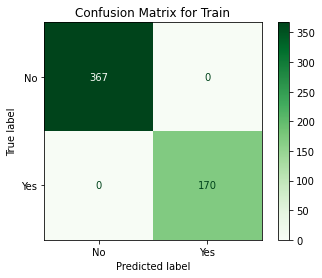

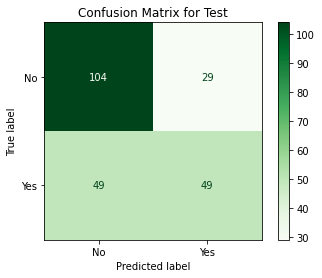

In [27]:
# Calling the metrics function
DT_scores=metrics(DT_model,X_train,X_test,y_train,y_test)

In [28]:
model_scores(DT_scores) #storing the scores

## Random Forest Algorithm

Class_weight can be balanced,balanced subsample,None or a dictionary of weights.
. Balanced here means the same as that of decision tree
. balanced subsample: Random forest is a bagging(bootstrap)ensembling method. Random samples with replacement are taken to build each decision tree in it. If the class weight was balanced, it will be balanced for the entire dataset but not for each bootstrapped data. Balanced subsample accounts for balancing in each of the bootstrapped dataset

In [29]:
RF_model=RandomForestClassifier(random_state=10,class_weight="balanced_subsample")
RF_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=10)

PERFORMANCE OF THE MODEL FOR BOTH TRAIN AND TEST DATA
Accuracy   : Train: 1.0 : Test: 0.76
Recall Score   : Train: 1.0 : Test: 0.61
Precision Score   : Train: 1.0 : Test: 0.77
F1 score   : Train: 1.0 : Test: 0.68


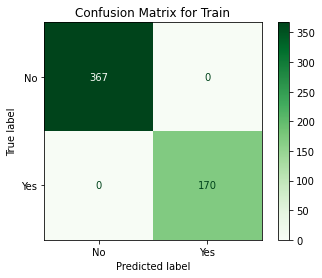

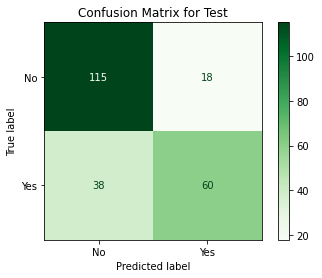

In [30]:
RF_scores=metrics(RF_model,X_train,X_test,y_train,y_test)

In [31]:
model_scores(RF_scores)

## Gradient Boosting

In [32]:
GB_model=GradientBoostingClassifier(random_state=2)
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=2)

PERFORMANCE OF THE MODEL FOR BOTH TRAIN AND TEST DATA
Accuracy   : Train: 0.94 : Test: 0.73
Recall Score   : Train: 0.86 : Test: 0.64
Precision Score   : Train: 0.95 : Test: 0.7
F1 score   : Train: 0.9 : Test: 0.67


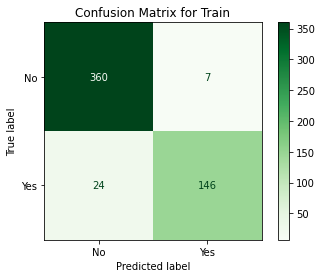

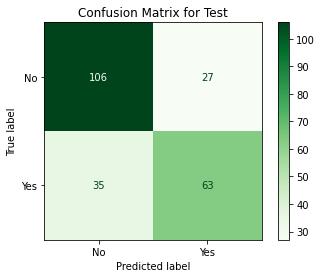

In [33]:
GB_score=metrics(GB_model,X_train,X_test,y_train,y_test)

In [34]:
model_scores(GB_score)

#### Observation
1) The models are all overfitted by the training data with the training scores being 1.0 except for Gradient Boosting Classifier with 0.94 <br />
2) Decision tree has the lowest recall score of 0.5 while Gradient boosting has the highest recall score of 0.64

# Hypertuning the Models

**Hypertuning all the models to choose the model that best increase the Recall score and reduce the number of false negative**

### Hypertuning the Decision Tree model

There are two methods of hypertuning a decision tree

1) Cost complexity pruning method<br />
2) Optimizing its parameters and this can be done using RandomSearchCV or GridSearcCV

**Using cost complexity pruning path method**

In [35]:
path=DT_model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [36]:
alpha_val=[] # creating an empty list to append the ccp alphas and list of scores
for ccp_alpha in ccp_alphas:
    pruned_model=DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    scores=cross_val_score(pruned_model,X_train,y_train,cv=5) # doing a cross validation on the ccp alphas
    alpha_val.append([ccp_alpha,np.mean(scores)]) # Taking the mean of the cross validated ccp alphas

In [37]:
# Creating a dataframe to append the ccp alpha and the mean accuracy scores
results=pd.DataFrame(alpha_val,columns=["ccp alpha","mean accuracy"])
results.head(3)

,ccp alpha,mean accuracy
0,0.000000e+00,0.685358
1,3.265362e-18,0.685358
2,5.142722e-18,0.685358


<Figure size 1080x720 with 0 Axes>

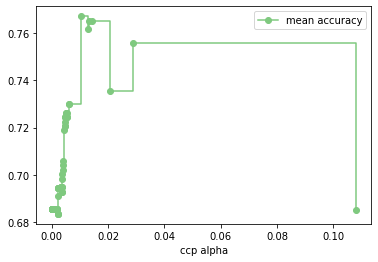

In [38]:
# Visualizing the plot of the mean accuracy against the ccp alpha so as to choose the ccp alpha with highest accuracy
plt.figure(figsize=(15,10))
results.plot(x="ccp alpha",y="mean accuracy",marker="o",drawstyle="steps-post")
plt.show()

In [39]:
#To get the exact ccp alpha that gave the best mean accuracy,I will filter the dataframe to get the ccp alpha with mean accuracy > 0.76
results[results["mean accuracy"]>0.76]

,ccp alpha,mean accuracy
56,0.010332,0.767117
57,0.012956,0.761509
58,0.013268,0.765247
59,0.014408,0.765247


In [40]:
## The highest mean accuracy filtered out is 0.767117 and it's ccp alpha is 0.010332
## Refitting the model with the parameters above
DT_pruned_model=DecisionTreeClassifier(random_state=1,ccp_alpha=0.010332,class_weight="balanced")
DT_pruned_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.010332, class_weight='balanced',
                       random_state=1)

PERFORMANCE OF THE MODEL FOR BOTH TRAIN AND TEST DATA
Accuracy   : Train: 0.81 : Test: 0.72
Recall Score   : Train: 0.79 : Test: 0.69
Precision Score   : Train: 0.66 : Test: 0.67
F1 score   : Train: 0.72 : Test: 0.68


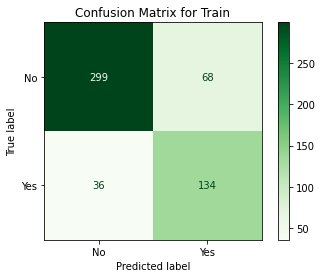

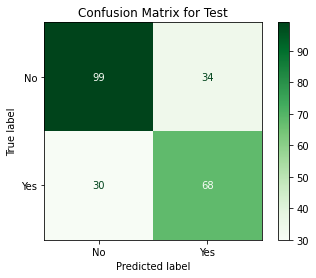

In [41]:
 # calling the metric function and passing the arguments into it
DT_pruned_score=metrics(DT_pruned_model,X_train,X_test,y_train,y_test)

In [42]:
model_scores(DT_pruned_score)

**Hypertuning using GridSearchCV(optimization)**

In [43]:
DT_optimized=DecisionTreeClassifier(random_state=1,class_weight="balanced")

parameters={"max_features":["auto","sqrt","log2"],
            'min_samples_leaf': [10, 7, 5],
            "max_depth":[None,3,5,9,10],
            'max_leaf_nodes' : [ 5,7, 10],
            "min_samples_split":[2,3,5,7,10],
           "min_impurity_decrease": [0.0001,0.001,0.01,0.1]}

from sklearn.metrics import make_scorer
scorer = make_scorer(recall_score) # using recall score as the metric to evaluate by

Tuned= GridSearchCV(DT_optimized,param_grid=parameters, scoring=scorer,n_jobs=-1,cv=5) # running the Grid search
Tuned = Tuned.fit(X_train, y_train)

DT_optimized = Tuned.best_estimator_  #Selecting the best estimator from the Grid Search
 
DT_optimized.fit(X_train, y_train) #fitting the best estimator to the model

DecisionTreeClassifier(class_weight='balanced', max_features='auto',
                       max_leaf_nodes=5, min_impurity_decrease=0.01,
                       min_samples_leaf=10, random_state=1)

PERFORMANCE OF THE MODEL FOR BOTH TRAIN AND TEST DATA
Accuracy   : Train: 0.66 : Test: 0.67
Recall Score   : Train: 0.9 : Test: 0.89
Precision Score   : Train: 0.48 : Test: 0.57
F1 score   : Train: 0.63 : Test: 0.7


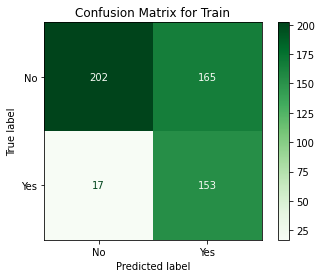

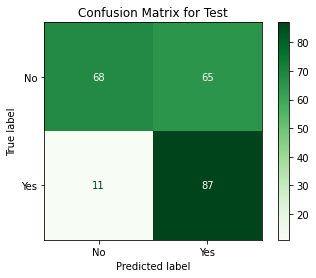

In [44]:

DT_optimized_score=metrics(DT_optimized,X_train,X_test,y_train,y_test)

In [45]:
model_scores(DT_optimized_score)

#### Observation

After hypertuning the Decision Tree algorithm with 2 methods( Cost complexity pruning and GridCv),i deduced that:
1) The Cost complexity pruning gave a Test recall score of 0.69 and false negatives of 30. This is a higher recall score than the pre-pruned decision tree of 0.5 <br />
2) The GridCV gave the highest test recall value of 0.89 and False negatives of 11 which is the best among the decision tree model so far

### Tuning the Random Forest Clasifier

In [46]:
RF_pre_tuned = RandomForestClassifier(random_state=10,class_weight="balanced_subsample")

parameters= {"n_estimators": [100,200,250,500],
            "max_depth":[None],
            "min_samples_leaf": [3,5,7,10],
            "max_features": ['auto']
            }
scorer = make_scorer(recall_score)

RF_pre_tuned=GridSearchCV(RF_pre_tuned,param_grid=parameters,n_jobs=-1,scoring=scorer,cv=5)

RF_pre_tuned.fit(X_train,y_train)
RF_tuned = RF_pre_tuned.best_estimator_  
 
RF_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=10,
                       n_estimators=200, random_state=10)

PERFORMANCE OF THE MODEL FOR BOTH TRAIN AND TEST DATA
Accuracy   : Train: 0.83 : Test: 0.77
Recall Score   : Train: 0.84 : Test: 0.76
Precision Score   : Train: 0.69 : Test: 0.72
F1 score   : Train: 0.76 : Test: 0.74


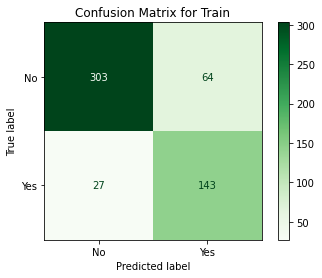

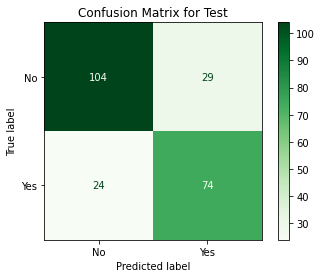

In [47]:
RF_tuned_score=metrics(RF_tuned,X_train,X_test,y_train,y_test)

In [48]:
model_scores(RF_tuned_score)

### Tuning the Gradient Boosting Clasifier

In [49]:
gbc = GradientBoostingClassifier(random_state=5)
parameters = {
    "n_estimators":[10,20,30],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.001,0.01,0.1,0.2,0.03],
    "min_samples_leaf":[1,3,4]
}
gbc1= GridSearchCV(gbc,parameters,cv=5,scoring = make_scorer(recall_score))
gbc1.fit(X_train,y_train)

GB_tuned= gbc1.best_estimator_   
GB_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=30, random_state=5)

PERFORMANCE OF THE MODEL FOR BOTH TRAIN AND TEST DATA
Accuracy   : Train: 0.91 : Test: 0.72
Recall Score   : Train: 0.8 : Test: 0.58
Precision Score   : Train: 0.91 : Test: 0.7
F1 score   : Train: 0.85 : Test: 0.64


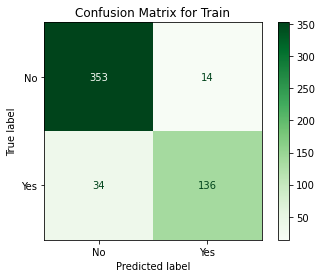

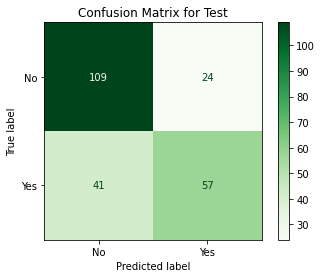

In [50]:
GB_tuned_score=metrics(GB_tuned,X_train,X_test,y_train,y_test)

In [51]:
model_scores(GB_tuned_score)

In [52]:
test_recall_score

[0.5,
 0.6122448979591837,
 0.6428571428571429,
 0.6938775510204082,
 0.8877551020408163,
 0.7551020408163265,
 0.5816326530612245]

In [53]:
model_metrics = pd.DataFrame({'Model Names':['Decision Tree','Random Forest','Gradient Boosting','Pruned Decision Tree',
                            'Optimized Decision Tree','Tuned Random Forest','Tuned Gradient Boosting'], 
                            'Train_Accuracy_Score':np.round(train_accuracy_score,2),'Test_Accuracy_Score': np.round(test_accuracy_score,2),
                            'Train_Recall_Score':np.round(train_recall_score,2),'Test_Recall_Score':np.round(test_recall_score,2),
                            'Train_Precision_Score':np.round(train_precision_score,2),'Test_Precision_Score':np.round(test_precision_score,2),
                            'Train_F1 Score':np.round(train_f1_score,2),"Test_F1 Score":np.round(test_f1_score,2)}) 

In [54]:
model_metrics

,Model Names,Train_Accuracy_Score,Test_Accuracy_Score,Train_Recall_Score,Test_Recall_Score,Train_Precision_Score,Test_Precision_Score,Train_F1 Score,Test_F1 Score
0,Decision Tree,1.00,0.66,1.00,0.50,1.00,0.63,1.00,0.56
1,Random Forest,1.00,0.76,1.00,0.61,1.00,0.77,1.00,0.68
2,Gradient Boosting,0.94,0.73,0.86,0.64,0.95,0.70,0.90,0.67
3,Pruned Decision Tree,0.81,0.72,0.79,0.69,0.66,0.67,0.72,0.68
4,Optimized Decision Tree,0.66,0.67,0.90,0.89,0.48,0.57,0.63,0.70
5,Tuned Random Forest,0.83,0.77,0.84,0.76,0.69,0.72,0.76,0.74
6,Tuned Gradient Boosting,0.91,0.72,0.80,0.58,0.91,0.70,0.85,0.64


In [55]:
model_metrics.sort_values(by='Test_Recall_Score',ascending=False)#Sort values in descending order using the Test Recall score

,Model Names,Train_Accuracy_Score,Test_Accuracy_Score,Train_Recall_Score,Test_Recall_Score,Train_Precision_Score,Test_Precision_Score,Train_F1 Score,Test_F1 Score
4,Optimized Decision Tree,0.66,0.67,0.90,0.89,0.48,0.57,0.63,0.70
5,Tuned Random Forest,0.83,0.77,0.84,0.76,0.69,0.72,0.76,0.74
3,Pruned Decision Tree,0.81,0.72,0.79,0.69,0.66,0.67,0.72,0.68
2,Gradient Boosting,0.94,0.73,0.86,0.64,0.95,0.70,0.90,0.67
1,Random Forest,1.00,0.76,1.00,0.61,1.00,0.77,1.00,0.68
6,Tuned Gradient Boosting,0.91,0.72,0.80,0.58,0.91,0.70,0.85,0.64
0,Decision Tree,1.00,0.66,1.00,0.50,1.00,0.63,1.00,0.56


**The best model with the highest Test Recall score is the Decision tree that was hypertuned using GridSearchCV with a recall score of 89% and false negatives of 11. It is also the most generalized model.**

Out of the 98 patients that actually had diabetes,the model correctly predicted that 87 had diabetes and made wrongly classified 11 people as not having diabetes.**

**Having known the best model(according to the metric..Recall score),it's time to know which variables were most responsible in the patient having or not having diabetes**

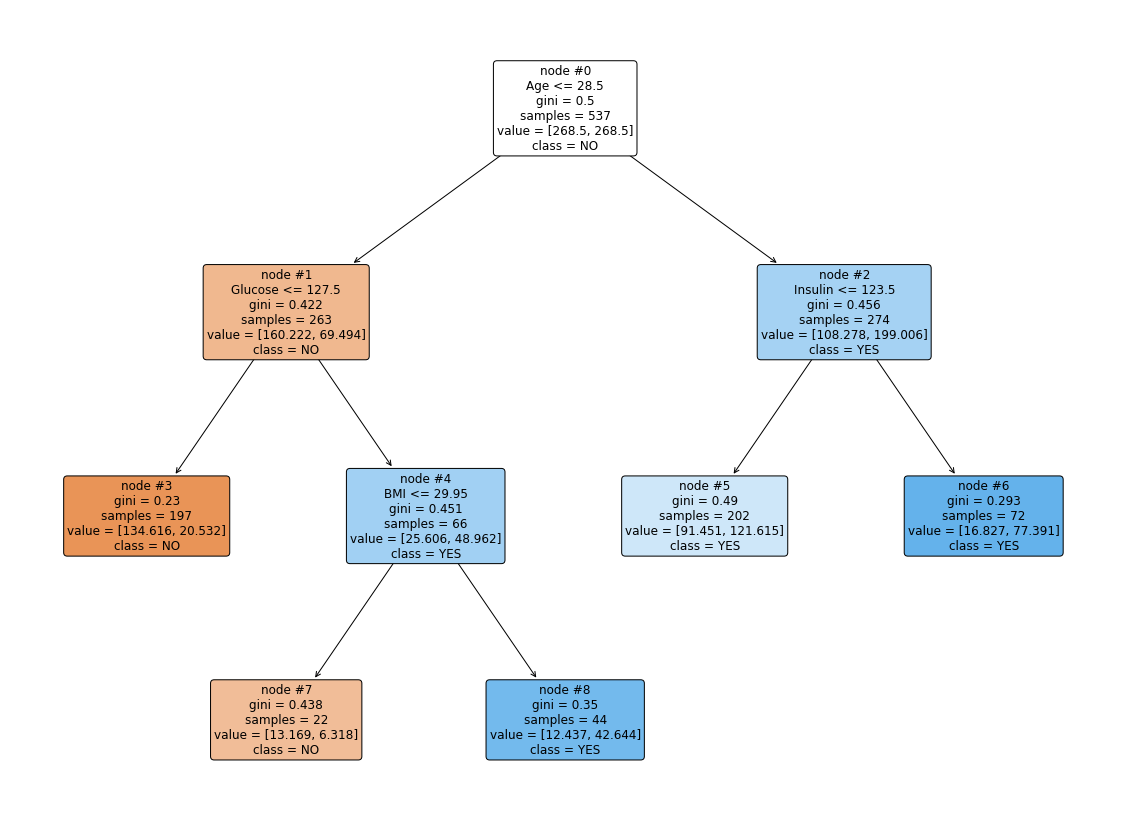

In [56]:
##Visualizing the decision tree
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(DT_optimized,filled=True,rounded=True,feature_names=X.columns,fontsize=12,node_ids=True,class_names=["NO","YES"])
plt.show()

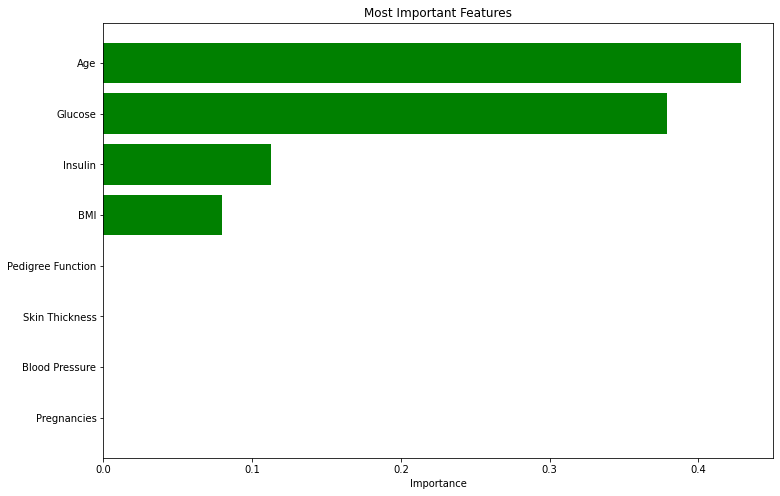

In [57]:
feature_names = X_train.columns
important_features = DT_optimized.feature_importances_
indices = np.argsort(important_features)

plt.figure(figsize=(12,8))
plt.title('Most Important Features')
plt.barh(range(len(indices)), important_features[indices], color='Green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()

The most important and deciding factors according to the model that predicted the lowest false negatives are
1) Age<br />
2) Glucose<br />
3) Insulin<br />
4) BMI<br /><br />
**The people who had diabetes had the following values in their variables:**
1) Age >28.5<br />
2) Glucose>127.5mg/dL<br />
3) BMI>29.95<br />
4)Insulin <=123.5 or>123.5

# CONCLUSIONS

1) The model has been successfully optimized and it has the lowest False negative value and is the best model among all the algorithms used based on this<br />
2) The model incorrectly classified 11 out of 98 diabetic patient as non-diabetic. More optimization could be done in the future to get better metric values<br />
3) Women older than 28 years should watch their glucose level and their weight well so as not to run risk of having diabetes.<br />
4) According to the medical BMI,obesity starts from 30 and is same as what the decision tree optimized. That being said, it is advisable that women should watch their weight and stay fit.<br />
5) The initial Data Exploratory Data analysis hit most of the mark the models hit with only minimal deviation. This shows the importance of doing Exploratory data analysis even before building a model.